In [ ]:
#!pip install selenium webdriver-manager

In [2]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|██████████| 6.79M/6.79M [00:35<00:00, 200kB/s] 
C:\Users\RizzWann\AppData\Local\Temp\ipykernel_192\1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [7]:
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

In [6]:
from selenium.webdriver.common.by import By
#driver.find_element(By.XPATH,'//div[text()="Accept"]').click()#for accept coockies

In [9]:
book_category = driver.find_elements(By.CLASS_NAME,'category-page__member-link'
                                   )
book_category

[<selenium.webdriver.remote.webelement.WebElement (session="67a349782e0a7705cd1ec9d1abedb564", element="fb7db984-039f-42d2-bfd4-f1068627e853")>,
 <selenium.webdriver.remote.webelement.WebElement (session="67a349782e0a7705cd1ec9d1abedb564", element="bc256c9e-4501-4e64-9b5e-c24d64b4ca2f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="67a349782e0a7705cd1ec9d1abedb564", element="ca225968-85b0-4543-b017-6b71cf577996")>,
 <selenium.webdriver.remote.webelement.WebElement (session="67a349782e0a7705cd1ec9d1abedb564", element="b055ae35-7f07-4bcb-920a-8881f3940db7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="67a349782e0a7705cd1ec9d1abedb564", element="b349107f-d01d-411e-81e8-10256cfc1d29")>,
 <selenium.webdriver.remote.webelement.WebElement (session="67a349782e0a7705cd1ec9d1abedb564", element="08166431-1ec4-4566-9918-3a9650178d79")>,
 <selenium.webdriver.remote.webelement.WebElement (session="67a349782e0a7705cd1ec9d1abedb564", element="d8252d29-6072-4ff7-9ab3-81

In [11]:
book_category[0].text

'Category:Baptism of Fire characters'

In [13]:
book_category[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [15]:
books = []
for category in book_category:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url": book_url})

In [16]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [17]:
character_list = []

for book in books:
    # go to book page
    driver.get(book['url'])
    
    character_elems = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')
    
    for elem in character_elems:
        character_list.append({'book': book['book_name'],'character': elem.text})

In [18]:
df=pd.DataFrame(character_list)
df.head()

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

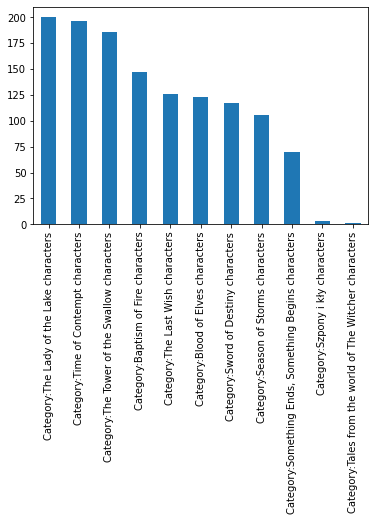

In [20]:
df.book.value_counts().plot(kind='bar')
plt.show()

In [ ]:
#!pip install pyvis networkx

In [1]:
import pandas as pd
import numpy as np
import pyvis as pv
import networkx as nx
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
NER = spacy.load("en_core_web_sm")

In [3]:
import os
all_books = [b for b in os.scandir("E:DS/Datasets/text/") if '.txt' in b.name ]
all_books

[<DirEntry 'B - The Sword of Destiny.txt'>,
 <DirEntry 'C - The Last Wish.txt'>,
 <DirEntry 'E - something ends something begins.txt'>,
 <DirEntry 'I - Blood of Elves.txt'>,
 <DirEntry 'II - Times of Contempt.txt'>,
 <DirEntry 'III - Baptism of Fire.txt'>,
 <DirEntry 'IV - The Tower of the Swallow.txt'>,
 <DirEntry 'V - The Lady of the Lake.txt'>]

In [4]:
book = all_books[0]
text_book =  open(book).read()
book_doc = NER(text_book)

In [5]:
displacy.render(book_doc[:1000],style='ent')

In [6]:
df=pd.read_csv("E:DS/Datasets/text/witcher.csv")
df.head()

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs


In [7]:
import re

In [8]:
df.character = df.character.apply(lambda x:re.sub("[\(].*?[\)]","",x))
df["first_name"] = df.character.apply(lambda x:x.split(' ',1)[0])
df

,book,character,first_name
0,Category:Baptism of Fire characters,Adalia,Adalia
1,Category:Baptism of Fire characters,Adela,Adela
2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,Category:Baptism of Fire characters,Aglaïs,Aglaïs
...,...,...,...
1270,Category:Time of Contempt characters,Yanna of Murivel,Yanna
1271,Category:Time of Contempt characters,Yarpen Zigrin,Yarpen
1272,Category:Time of Contempt characters,Yennefer of Vengerberg,Yennefer
1273,Category:Time of Contempt characters,Yiolenta Suarez,Yiolenta


In [12]:
sent_entity_df = []
for sent in book_doc.sents:
    ent_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"Sentence":sent,"entities":ent_list}
                         )
    

In [13]:
sent_entity_df=pd.DataFrame(sent_entity_df)
sent_entity_df

,Sentence,entities
0,"(ï»¿The, Limits, of, the, Possible, \n, I, \n,...",[ï»¿The Limits of the Possible]
1,"("", It, 's, been, an, hour, and, a, quarter, s...",[an hour and a quarter]
2,"(He, 's, done, for, .)",[]
3,"("", \n, The, townsfolk, ,, huddled, together, ...",[]
4,"(A, fat, man, dressed, in, a, yellow, smock, \...",[]
...,...,...
11327,"("", \n, Yurga, saw, astonishment, in, the, eye...",[Yurga]
11328,"(He, heard, Chrysididae, 's, discreet, sobs, a...",[]
11329,"(He, knew, that, he, would, not, understand, t...",[]
11330,"(With, good, reason, :, \n, "", You, 're, more,...",[]


In [14]:
def filter_entity(ent_list,character_df):
    return [
        ent for ent in ent_list
        if ent in list(character_df.character)
        or
        ent in list(character_df.first_name)
    ]

In [15]:
filter_entity(['Geralt','Thu','2','rizz'],df)

['Geralt']

In [18]:
sent_entity_df['character_entities'] = sent_entity_df.entities.apply(lambda x:filter_entity(x,df))
sent_entity_df_filtered = sent_entity_df[sent_entity_df.character_entities.map(len)>0]
sent_entity_df_filtered.head(10)

,Sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt of Rivia]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt of Rivia]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
140,"("", I, forgot, ,, "", Three, Jackdaws, winked, ...","[Three Jackdaws, Geralt]",[Geralt]
151,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
157,"("", Do, the, girls, speak, the, common, langua...",[Geralt],[Geralt]
160,"(How, 's, your, soup, ,, Geralt, ?, "", \n, "", ...","[Geralt, Hmm]",[Geralt]
169,"(Yet, there, is, a, certain, principal, underl...",[Geralt],[Geralt]


In [20]:
sent_entity_df_filtered.character_entities = sent_entity_df_filtered.character_entities.apply(lambda x:
                                                [item.split()[0]
                                                 for item in x
                                                ]
                                                )

C:\Users\RizzWann\AppData\Local\Temp\ipykernel_8164\520814053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered.character_entities = sent_entity_df_filtered.character_entities.apply(lambda x:


In [21]:
sent_entity_df_filtered

,Sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
...,...,...,...
11314,"(He, only, saw, black, -, gloved, hands, squee...",[Ciri],[Ciri]
11316,"(Oh, ,, Geralt, !)",[Geralt],[Geralt]
11321,"(Say, it, ,, Geralt, !)",[Geralt],[Geralt]
11322,"(Forever, !, Say, it, !, "", \n, "", Forever, ,,...","[Forever, Ciri, Geralt]","[Ciri, Geralt]"


In [23]:
window_size = 5
relation_ship = []
for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5,sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.iloc[i:end_i].character_entities),[])
    char_unique = [
        char_list[i] for i in range(len(char_list))
        if (i==0) or char_list[i] != char_list[i-1]
    ]
    if len(char_unique) > 1:
        for idx,a in enumerate(char_unique[:-1]):
            b = char_unique[idx+1]
            relation_ship.append({"source":a,"target":b})

In [25]:
relation_ship_df =pd.DataFrame(relation_ship)
relation_ship_df.head(10)

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Niedamir,Geralt
3,Geralt,Niedamir
4,Niedamir,Geralt
5,Geralt,Niedamir
6,Niedamir,Geralt
7,Geralt,Niedamir
8,Niedamir,Geralt
9,Geralt,Niedamir


In [26]:
relation_ship_df.shape

(4999, 2)

In [27]:
relation_ship_df = pd.DataFrame(np.sort(relation_ship_df.values,axis=1),columns=relation_ship_df.columns)
relation_ship_df

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Geralt,Niedamir
4,Geralt,Niedamir
...,...,...
4994,Ciri,Geralt
4995,Ciri,Geralt
4996,Geralt,Yurga
4997,Ciri,Geralt


In [28]:
relation_ship_df["value"] = 1
relation_ship_df = relation_ship_df.groupby(['source','target'],sort=False,as_index=False).sum()

In [29]:
relation_ship_df

,source,target,value
0,Geralt,Niedamir,86
1,Geralt,Two,29
2,Eyck,Geralt,72
3,Eyck,Yarpen,32
4,Geralt,Yarpen,53
...,...,...,...
173,Two,Yurga,4
174,Ciri,Dandelion,4
175,Nadbor,Yurga,4
176,Nadbor,Sulik,4


In [30]:
G = nx.from_pandas_edgelist(relation_ship_df,
                           source='source',
                            target='target',
                            edge_attr= 'value',
                            create_using= nx.Graph()
                           )

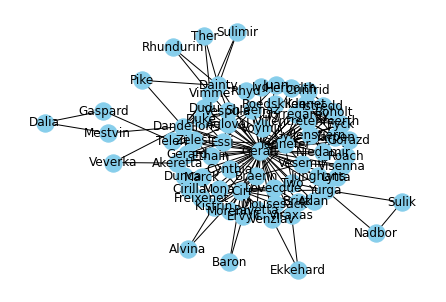

In [31]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos=pos)
plt.show()

In [36]:
from pyvis.network import Network
net = Network(notebook=True,width='1000px',height='700px',bgcolor='#222222',font_color='white'
             )
node_degree = dict(G.degree)
nx.set_node_attributes(G,node_degree,'size')
net.from_nx(G)
net.show("Witcher.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [37]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.8142857142857143,
 'Niedamir': 0.11428571428571428,
 'Two': 0.05714285714285714,
 'Eyck': 0.12857142857142856,
 'Yarpen': 0.12857142857142856,
 'Dorregaray': 0.09999999999999999,
 'Yennefer': 0.2571428571428571,
 'Gyllenstiern': 0.11428571428571428,
 'Boholt': 0.14285714285714285,
 'Kennet': 0.08571428571428572,
 'Crinfrid': 0.02857142857142857,
 'Villentretenmerth': 0.08571428571428572,
 'Istredd': 0.04285714285714286,
 'Herbolth': 0.02857142857142857,
 'Ivo': 0.014285714285714285,
 'Roedskilde': 0.02857142857142857,
 'Vespula': 0.05714285714285714,
 'Dandelion': 0.19999999999999998,
 'Pike': 0.02857142857142857,
 'Dainty': 0.14285714285714285,
 'Dudu': 0.04285714285714286,
 'Rhyd': 0.02857142857142857,
 'Vimme': 0.08571428571428572,
 'Sulimir': 0.02857142857142857,
 'Ther': 0.02857142857142857,
 'Rhundurin': 0.02857142857142857,
 "Sh'eenaz": 0.08571428571428572,
 'Agloval': 0.09999999999999999,
 'Teleri': 0.04285714285714286,
 'Gaspard': 0.02857142857142857,
 'Dalia': 0.

In [44]:
def plot_cenrality(degree_dict):
    degree_df = pd.DataFrame.from_dict(degree_dict,orient='index',columns=['centrality'],)
    degree_df.sort_values('centrality',ascending=False)[:9].plot(kind='bar')
    

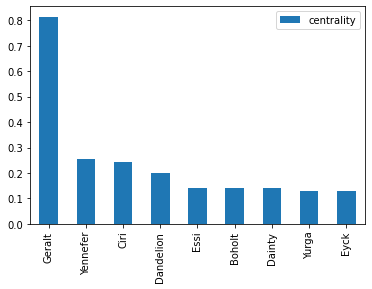

In [45]:
degree_dict = nx.degree_centrality(G)
plot_cenrality(degree_dict)

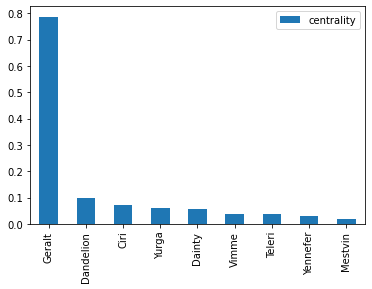

In [46]:
degree_betweenness_dict = nx.betweenness_centrality(G)
plot_cenrality(degree_betweenness_dict)

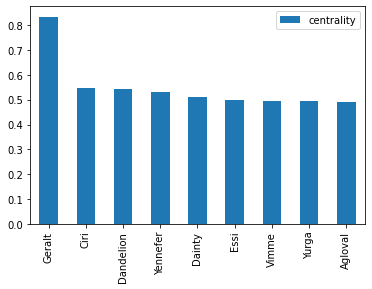

In [47]:
degree_clossness_dict = nx.closeness_centrality(G)
plot_cenrality(degree_clossness_dict)

In [48]:
nx.set_node_attributes(G,degree_dict,'degree_cent')
nx.set_node_attributes(G,degree_betweenness_dict,'betweenness_cent')
nx.set_node_attributes(G,degree_clossness_dict,'clossness_cent')

In [50]:
#!pip install python-louvain

In [51]:
import community as community_louvain

In [52]:
communities = community_louvain.best_partition(G)

In [53]:
communities

{'Geralt': 2,
 'Niedamir': 1,
 'Two': 5,
 'Eyck': 1,
 'Yarpen': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Gyllenstiern': 1,
 'Boholt': 1,
 'Kennet': 1,
 'Crinfrid': 2,
 'Villentretenmerth': 1,
 'Istredd': 2,
 'Herbolth': 2,
 'Ivo': 2,
 'Roedskilde': 2,
 'Vespula': 4,
 'Dandelion': 4,
 'Pike': 4,
 'Dainty': 4,
 'Dudu': 4,
 'Rhyd': 4,
 'Vimme': 4,
 'Sulimir': 4,
 'Ther': 4,
 'Rhundurin': 4,
 "Sh'eenaz": 0,
 'Agloval': 0,
 'Teleri': 4,
 'Gaspard': 4,
 'Dalia': 4,
 'Mestvin': 4,
 'Essi': 0,
 'Gerard': 0,
 'Zelest': 0,
 'Duke': 0,
 'Veverka': 0,
 'Akeretta': 0,
 'Ethain': 2,
 'Juan': 0,
 'Cynthia': 0,
 'Ciri': 3,
 'Braenn': 2,
 'Dunca': 2,
 'Ervyll': 3,
 'Kistrin': 2,
 'Marck': 2,
 'Voymir': 2,
 'Alvina': 2,
 'Vesemir': 2,
 'Cirilla': 2,
 'Freixenet': 3,
 'Venzlav': 3,
 'Ekkehard': 3,
 'Viraxas': 3,
 'Morenn': 3,
 'Mona': 2,
 'Pavetta': 3,
 'Baron': 3,
 'Junghans': 3,
 'Brick': 3,
 'Levecque': 3,
 'Mousesack': 3,
 'Yurga': 5,
 'Visenna': 2,
 'Atlan': 5,
 'Lytta': 2,
 'Gorazd': 2,
 'Roach': 5,


In [54]:
nx.set_node_attributes(G,communities,'group')

In [55]:
com_net = Network(notebook=True,width='1000px',height='700px',bgcolor='#222222',font_color='white'
             )
com_net.from_nx(G)
com_net.show("Witcher.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


#### For more network anaylaytics
coursera course :
    https://www.coursera.org/learn/big-data-graph-analytics?